In [76]:
# load general modules
import os
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
# import modules - classification
from sklearn.metrics import accuracy_score,recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve,f1_score, auc

In [77]:
# 데이터 불러오기

data = pd.read_csv('.\p2p_data.csv')

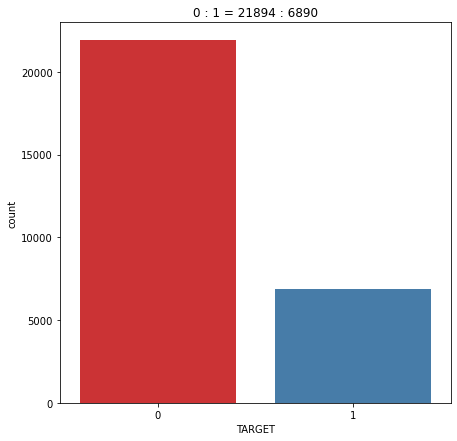

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
sns.countplot(data['TARGET'], palette='Set1', ax=ax)
ax.set_title("0 : 1 = {} : {}".format(*data['TARGET'].value_counts()))
plt.show()

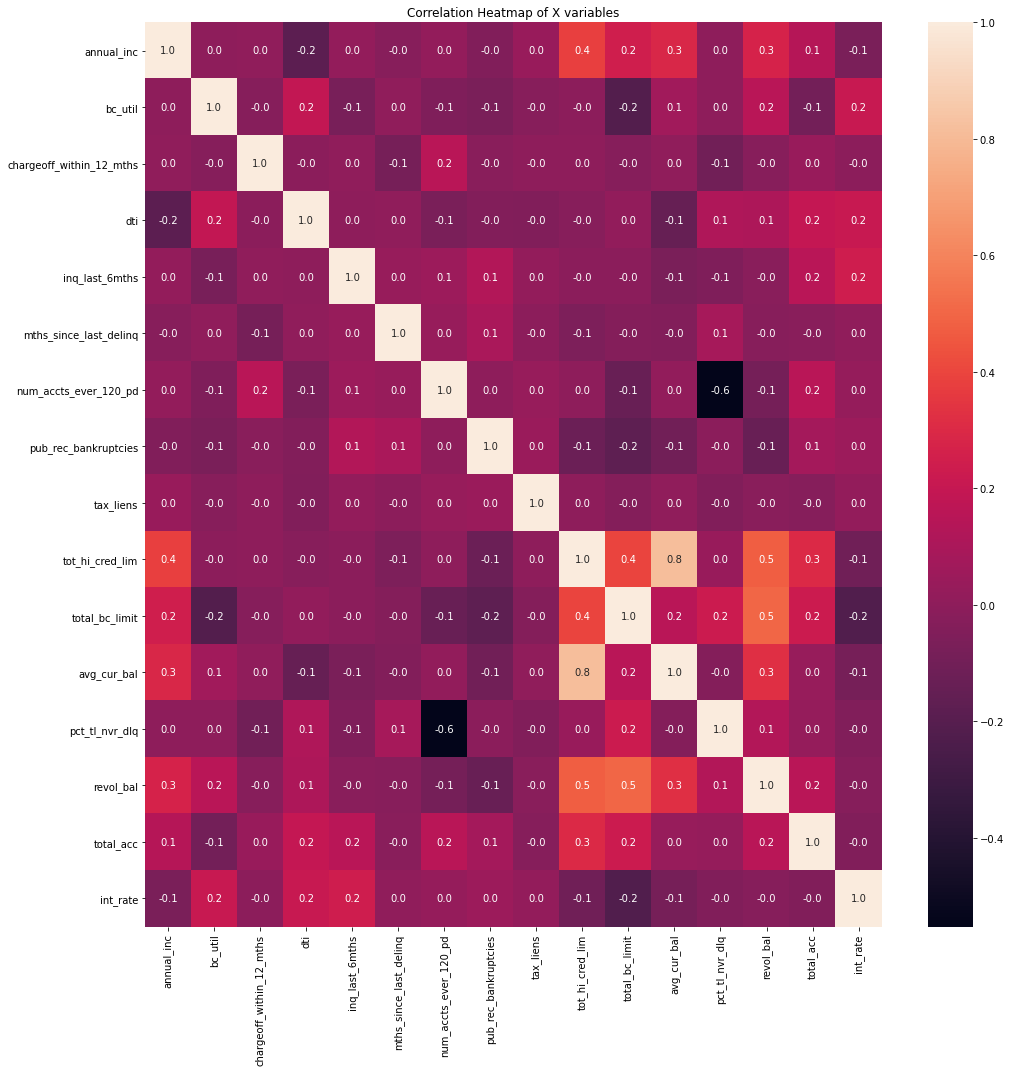

In [79]:
#변수간 Correlation 확인
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax = sns.heatmap(data.drop(['TARGET'], axis=1).corr(), annot=True, fmt='.1f')
ax.set_title("Correlation Heatmap of X variables")
plt.tight_layout()
plt.show(fig)

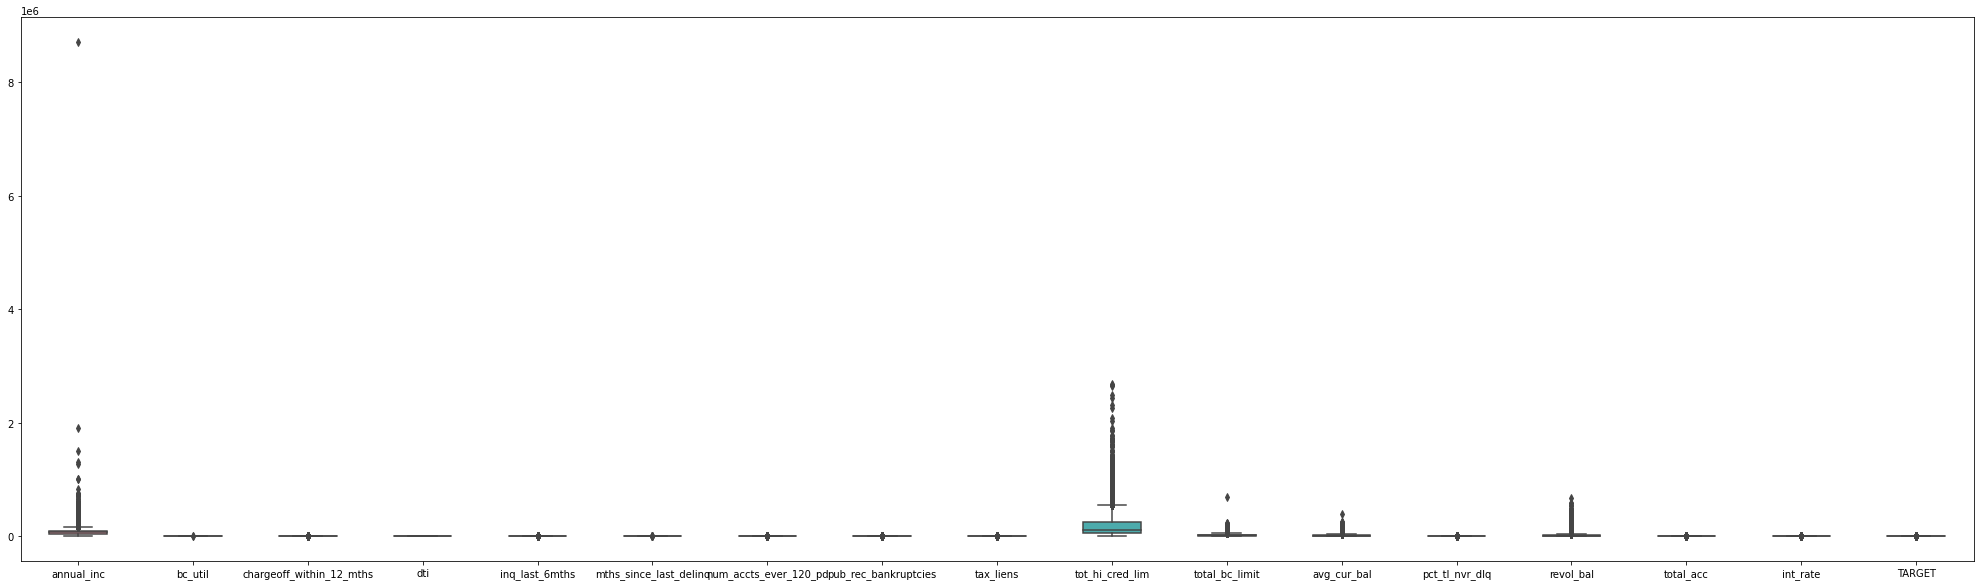

In [80]:
fig, ax = plt.subplots(figsize=(35, 10))
boxplot = sns.boxplot(data=data,ax=ax, width=0.5)
boxplot.tick_params(labelsize=10)
plt.savefig('boxplot.png')

In [81]:
data=data.drop(['verification_status','home_ownership','term'],axis=1)

In [82]:
#X변수와 Y변수 분리
#TARGET이 Y고 나머지가 X
y=data['TARGET'].values
X=data.drop('TARGET',axis=1)

In [83]:
#train data와 test data로 분할
X_train, X_test, y_train, y_test=train_test_split(X, y,
                                                 stratify=y,
                                                 test_size=0.2,
                                                 random_state=93456)

In [84]:
# Random Forest fitting

rf = RandomForestClassifier(criterion='entropy',random_state=2019)



In [85]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=1/9,
                                                      stratify=y_train,
                                                      random_state=2015010720)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred=rf.predict(X_test)
y_valid_pred = rf.predict(X_valid)

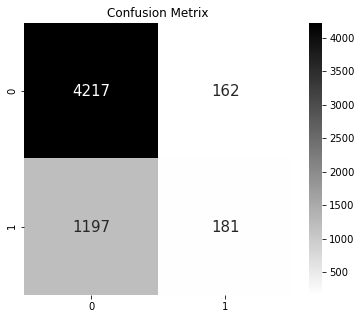

In [86]:
#Confusion Metrix 구성
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=np.unique(y), columns=np.unique(y))

plt.figure(figsize=(6, 5))
sns.heatmap(cm,
            annot=True, annot_kws={'size': 15},
            cmap='binary',fmt="d")
plt.title('Confusion Metrix')
plt.show()

## Train, Test, Validation 비교

- Accuracy (Train)      : 1.0
- Accuracy (Test) : 0.7639
- Accuracy (Validation) : 0.762

- F1 score (Train)      : 0.9999
- F1 score (Test) : 0.2103
- F1 score (Validation) : 0.1714

- precision score (Train)      : 1.0
- precision score (Test) : 0.5277
- precision score (Validation) : 0.5164

- recall score (Train)      : 0.9998
- recall score (Test) : 0.1313
- recall score (Validation) : 0.1028

- Specificity score (Train)      : 1.0
- Specificity score (Test) : 0.01245
- Specificity score (Validation) : 0.5164

- Balanced Correction Rate score (Train)      : 0.9999
- Balanced Correction Rate score (Test) : 0.3624
- Balanced Correction Rate score (Validation) : 0.3206

- Type 1 Error score (Train)      : 0.0
- Type 1 Error score (Test) : 0.03699
- Type 1 Error score (Validation) : 0.03032

- Type 2 Error score (Train)      : 0.0002041
- Type 2 Error score  (Test) : 0.0007257
- Type 2 Error score  (Validation) : 0.001631

- AUC       : 0.5472



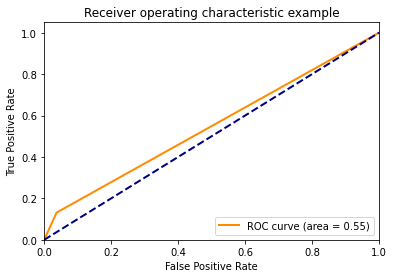

In [87]:
#아래 performance measure에 대해서 잘 알아야한다
#PDF 강의자료 참고하기!

# Show train & validation accuracies
#y_train:실제값이랑 y_train_pred: 예측값에 대한 것
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
#validation에 대한것
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print('- Accuracy (Validation) : {:.4}'.format(accuracy_score(y_valid, y_valid_pred)))
print(end="\n")
# Show train & validation f1 scores
#f1 score 계산할 때 우리가 recall 값을 계산해 줘야한다(민감도) 그리고 precision를 계산해
#줘야 하는데 positive 클래스가 어떤 것이냐에 따라 다르니까 옵션에 pos_label 즉
#positive 레이블을 뭘로 할꺼냐? 나는 관심있는 M 악성 종양을 positive class로 할것이라는 것이다
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred, pos_label=1)))
print('- F1 score (Test) : {:.4}'.format(f1_score(y_test, y_test_pred, pos_label=1)))
print('- F1 score (Validation) : {:.4}'.format(f1_score(y_valid, y_valid_pred, pos_label=1)))

print(end="\n")
# Show train & validation Precision scores
#마찬가지로 precision_score도 positive class를 옵션으로 선언해준다.
print('- precision score (Train)      : {:.4}'.format(precision_score(y_train, y_train_pred, pos_label=1)))
print('- precision score (Test) : {:.4}'.format(precision_score(y_test, y_test_pred, pos_label=1)))
print('- precision score (Validation) : {:.4}'.format(precision_score(y_valid, y_valid_pred, pos_label=1)))

print(end="\n")
# Show train & validation recall scores
#리콜도 마찬가지로 precision_score도 positive class를 옵션으로 선언해준다.
print('- recall score (Train)      : {:.4}'.format(recall_score(y_train, y_train_pred, pos_label=1)))
print('- recall score (Test) : {:.4}'.format(recall_score(y_test, y_test_pred, pos_label=1)))
print('- recall score (Validation) : {:.4}'.format(recall_score(y_valid, y_valid_pred, pos_label=1)))

print(end="\n")
#하지만 accuracy는 해줄 필요없다 왜냐면 그냥 대각선의 합이니까
tn, fp, fn, tp=confusion_matrix(y_train, y_train_pred).ravel()
tnt, fpt, fnt, tpt=confusion_matrix(y_test, y_test_pred).ravel()
tnv, fpv, fnv, tpv=confusion_matrix(y_valid, y_valid_pred).ravel()


spec_score=tp/(tp+fp)
spec_score_t=tpv/(tp+fpt)
spec_score_v=tpv/(tpv+fpv)


bcr=(spec_score*recall_score(y_train, y_train_pred, pos_label=1))**0.5
bcr_t=(spec_score*recall_score(y_test, y_test_pred, pos_label=1))**0.5
bcr_v=(spec_score*recall_score(y_valid, y_valid_pred, pos_label=1))**0.5


print('- Specificity score (Train)      : {:.4}'.format(spec_score))
print('- Specificity score (Test) : {:.4}'.format(spec_score_t))
print('- Specificity score (Validation) : {:.4}'.format(spec_score_v))

print(end="\n")

print('- Balanced Correction Rate score (Train)      : {:.4}'.format(bcr))
print('- Balanced Correction Rate score (Test) : {:.4}'.format(bcr_t))
print('- Balanced Correction Rate score (Validation) : {:.4}'.format(bcr_v))

print(end="\n")

t1=fp/(fp+tn)
t1_t=fpt/(fpt+tnt)
t1_v=fpv/(fpv+tnv)


t2=fn/(fn+tp)
t2_t=fn/(fnt+tpt)
t2_v=fn/(fnv+tpv)


print('- Type 1 Error score (Train)      : {:.4}'.format(t1))
print('- Type 1 Error score (Test) : {:.4}'.format(t1_t))
print('- Type 1 Error score (Validation) : {:.4}'.format(t1_v))

print(end="\n")

print('- Type 2 Error score (Train)      : {:.4}'.format(t2))
print('- Type 2 Error score  (Test) : {:.4}'.format(t2_t))
print('- Type 2 Error score  (Validation) : {:.4}'.format(t2_v))

y_pred = rf.predict(X_test)
print(end="\n")

fpr, tpr, thresholds =  roc_curve(y_test, y_pred, pos_label=1)
print('- AUC       : {:.4}'.format(auc(fpr, tpr)))
print(end="\n")
      
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 최적의 Max_Depth과 Criterion 찾기

###  5-CV Grid Search

In [39]:
base=RandomForestClassifier()

opt={'criterion':['entropy','gini'],'max_depth':[1,2,3,4,5]}
cv=GridSearchCV(estimator=base, param_grid=opt,cv=5, scoring='accuracy')

#### Fitting 시키기

In [88]:
cv_fitted=cv.fit(X_train, y_train)

#### 최적의 파라미터 찾기

In [89]:
cv_fitted.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [90]:
rf = RandomForestClassifier(criterion='gini',max_depth=5,random_state=2019)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=2019)

In [91]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=1/9,
                                                      stratify=y_train,
                                                      random_state=2015010720)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_valid_pred = rf.predict(X_valid)

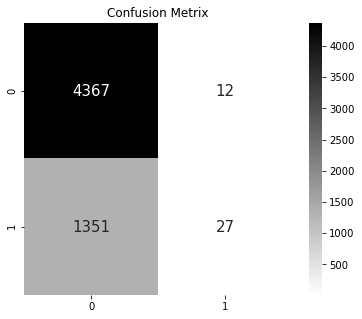

In [92]:
#Confusion Metrix 구성
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=np.unique(y), columns=np.unique(y))

plt.figure(figsize=(6, 5))
sns.heatmap(cm,
            annot=True, annot_kws={'size': 15},
            cmap='binary',fmt="d")
plt.title('Confusion Metrix')
plt.show()

- Accuracy (Train)      : 0.7649
- Accuracy (Test) : 0.7639
- Accuracy (Validation) : 0.7635

- F1 score (Train)      : 0.04764
- F1 score (Test) : 0.2103
- F1 score (Validation) : 0.03584

- precision score (Train)      : 0.7754
- precision score (Test) : 0.5277
- precision score (Validation) : 0.7692

- recall score (Train)      : 0.02458
- recall score (Test) : 0.1313
- recall score (Validation) : 0.01835

- Specificity score (Train)      : 0.7754
- Specificity score (Test) : 0.03717
- Specificity score (Validation) : 0.7692

- Balanced Correction Rate score (Train)      : 0.138
- Balanced Correction Rate score (Test) : 0.3191
- Balanced Correction Rate score (Validation) : 0.1193

- Type 1 Error score (Train)      : 0.00224
- Type 1 Error score (Test) : 0.03699
- Type 1 Error score (Validation) : 0.001734

- Type 2 Error score (Train)      : 0.9754
- Type 2 Error score  (Test) : 3.082
- Type 2 Error score  (Validation) : 7.793

- AUC       : 0.5084



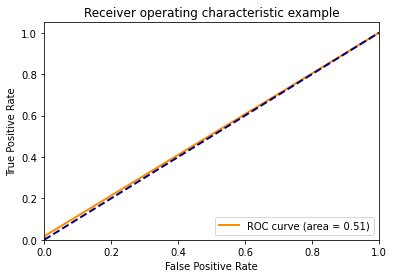

In [93]:
#아래 performance measure에 대해서 잘 알아야한다
#PDF 강의자료 참고하기!

# Show train & validation accuracies
#y_train:실제값이랑 y_train_pred: 예측값에 대한 것
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
#validation에 대한것
print('- Accuracy (Test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print('- Accuracy (Validation) : {:.4}'.format(accuracy_score(y_valid, y_valid_pred)))
print(end="\n")
# Show train & validation f1 scores
#f1 score 계산할 때 우리가 recall 값을 계산해 줘야한다(민감도) 그리고 precision를 계산해
#줘야 하는데 positive 클래스가 어떤 것이냐에 따라 다르니까 옵션에 pos_label 즉
#positive 레이블을 뭘로 할꺼냐? 나는 관심있는 M 악성 종양을 positive class로 할것이라는 것이다
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred, pos_label=1)))
print('- F1 score (Test) : {:.4}'.format(f1_score(y_test, y_test_pred, pos_label=1)))
print('- F1 score (Validation) : {:.4}'.format(f1_score(y_valid, y_valid_pred, pos_label=1)))

print(end="\n")
# Show train & validation Precision scores
#마찬가지로 precision_score도 positive class를 옵션으로 선언해준다.
print('- precision score (Train)      : {:.4}'.format(precision_score(y_train, y_train_pred, pos_label=1)))
print('- precision score (Test) : {:.4}'.format(precision_score(y_test, y_test_pred, pos_label=1)))
print('- precision score (Validation) : {:.4}'.format(precision_score(y_valid, y_valid_pred, pos_label=1)))

print(end="\n")
# Show train & validation recall scores
#리콜도 마찬가지로 precision_score도 positive class를 옵션으로 선언해준다.
print('- recall score (Train)      : {:.4}'.format(recall_score(y_train, y_train_pred, pos_label=1)))
print('- recall score (Test) : {:.4}'.format(recall_score(y_test, y_test_pred, pos_label=1)))
print('- recall score (Validation) : {:.4}'.format(recall_score(y_valid, y_valid_pred, pos_label=1)))

print(end="\n")
#하지만 accuracy는 해줄 필요없다 왜냐면 그냥 대각선의 합이니까
tn, fp, fn, tp=confusion_matrix(y_train, y_train_pred).ravel()
tnt, fpt, fnt, tpt=confusion_matrix(y_test, y_test_pred).ravel()
tnv, fpv, fnv, tpv=confusion_matrix(y_valid, y_valid_pred).ravel()


spec_score=tp/(tp+fp)
spec_score_t=tpv/(tp+fpt)
spec_score_v=tpv/(tpv+fpv)


bcr=(spec_score*recall_score(y_train, y_train_pred, pos_label=1))**0.5
bcr_t=(spec_score*recall_score(y_test, y_test_pred, pos_label=1))**0.5
bcr_v=(spec_score*recall_score(y_valid, y_valid_pred, pos_label=1))**0.5


print('- Specificity score (Train)      : {:.4}'.format(spec_score))
print('- Specificity score (Test) : {:.4}'.format(spec_score_t))
print('- Specificity score (Validation) : {:.4}'.format(spec_score_v))

print(end="\n")

print('- Balanced Correction Rate score (Train)      : {:.4}'.format(bcr))
print('- Balanced Correction Rate score (Test) : {:.4}'.format(bcr_t))
print('- Balanced Correction Rate score (Validation) : {:.4}'.format(bcr_v))

print(end="\n")

t1=fp/(fp+tn)
t1_t=fpt/(fpt+tnt)
t1_v=fpv/(fpv+tnv)


t2=fn/(fn+tp)
t2_t=fn/(fnt+tpt)
t2_v=fn/(fnv+tpv)


print('- Type 1 Error score (Train)      : {:.4}'.format(t1))
print('- Type 1 Error score (Test) : {:.4}'.format(t1_t))
print('- Type 1 Error score (Validation) : {:.4}'.format(t1_v))

print(end="\n")

print('- Type 2 Error score (Train)      : {:.4}'.format(t2))
print('- Type 2 Error score  (Test) : {:.4}'.format(t2_t))
print('- Type 2 Error score  (Validation) : {:.4}'.format(t2_v))

y_pred = rf.predict(X_test)
print(end="\n")

fpr, tpr, thresholds =  roc_curve(y_test, y_pred, pos_label=1)
print('- AUC       : {:.4}'.format(auc(fpr, tpr)))
print(end="\n")
      
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()